In [110]:
# %load adj_functions.sage
import numpy as np
from numpy import linalg

################################################################################
# Function: idempotents                                                        #
#                                                                              #
# Purpose: find principal idempotents of a Hermitian matrix                    #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#                                                                              #
# Returns: principal idempotents, eigenvalues                                  #
#                                                                              #
################################################################################

def idempotents(A):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    # Extracts eigenvalues and eigenvectors
    W,V = linalg.eigh(A)
    # Converts eigenvectors into orthonormal basis
    Q, R = linalg.qr(V) 
    Q = matrix(Q)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    idems = []
    evals = []
    i = 0
    j = 0
    while i < n:
        # Zero matrix
        E = matrix(n, n, 0)
        # Checks if eigenvectors share an eigenvalue
        while j < n and abs(W[i] - W[j]) < 0.01:
            # Converts eigenvector into column vecror
            v = Q.column(j).column()
            # updates idempotent
            E = E + v*v.conjugate_transpose();
            j = j + 1
        E = matrix(CDF,E)
        E = E.round(3)
        idems.append(E)
        evals.append(W[i].round(3))
        i = j
    return idems, evals

################################################################################
# Function: transfer                                                           #
#                                                                              #
# Purpose: return transfer matrix U(t) given adjacency matrix/Hamiltonian      #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   t        float                              time                           #
#   k        integer                            rounding accuracy              #
#                                                                              #
# Returns: transfer U(t)                                                       #
#                                                                              #
################################################################################

def transfer(A, t):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    idems, evals = idempotents(A)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    # Zero matrix
    U = matrix(n, n, 0)
    for i in range(len(idems)):
        # Updates transder matrix
        U = U + exp(-I*t*evals[i])*idems[i]
    return U
#     A = matrix(A)
#     return matrix(exp(-1*I*t*A))

################################################################################
# Function: transfer_at_time_r                                                 #
#                                                                              #
# Purpose: find real part of transfer matrix at specific time and index        #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: real part of U(t) at index [i][j]                                   #
#                                                                              #
################################################################################

def transfer_at_time_r(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].real()) < 0.00001:
        return 0
    return U[i][j].real()

################################################################################
# Function: transfer_at_time_i                                                 #
#                                                                              #
# Purpose: find imaginary part of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: imaginary part of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_i(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].imag()) < 0.00001:
        return 0
    return U[i][j].imag()

################################################################################
# Function: transfer_at_time_a                                                 #
#                                                                              #
# Purpose: find absolute value of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: absolute value of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_a(A,t,i,j):
    U = transfer(A,t)
    if U[i][j].abs() < 0.00001:
        return 0
    return U[i][j].abs()
    
################################################################################
# Function: parallel                                                           #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are parallel                               #
#                                                                              #
################################################################################

def parallel(a,b,idems):
    for M in idems:
        va = M[a].conjugate()
        vb = M[b]
        anorm=np.sqrt(M[a].dot_product(va))
        bnorm=np.sqrt(M[b].dot_product(M[b].conjugate()))
        if abs(abs(va.dot_product(vb))-anorm*bnorm)>0.0001:
            return False
    return True
    
################################################################################
# Function: cospec                                                             #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are cospectral                             #
#                                                                              #
################################################################################

def cospec(a,b,idems):
    for M in idems:
        if abs(M[a,a]- M[b,b])>0.001:
            return False
    return True

################################################################################
# Function: strcospec                                                          #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are strongly cospectral                    #
#                                                                              #
################################################################################

def strcospec(a,b,idems):
    if cospec(a,b,idems) and parallel(a,b,idems):
        return True
    return False

In [111]:
K3 = np.matrix([[0, -1j, 1j],[1j, 0, -1j],[-1j, 1j, 0]])
K3=matrix(K3)

C4 = np.matrix([[0, -1j, 0, 1j],[1j, 0, -1j, 0],[0, 1j, 0, -1j],[-1j, 0, 1j, 0]])
C4 = matrix(C4) 

C4

[   0.0 -1.0*I    0.0  1.0*I]
[ 1.0*I    0.0 -1.0*I    0.0]
[   0.0  1.0*I    0.0 -1.0*I]
[-1.0*I    0.0  1.0*I    0.0]

In [112]:
W = K3.tensor_product(identity_matrix(4))+identity_matrix(3).tensor_product(C4)
W.round(3)

[   0.0 -1.0*I    0.0  1.0*I -1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0    0.0]
[ 1.0*I    0.0 -1.0*I    0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0]
[   0.0  1.0*I    0.0 -1.0*I    0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0*I    0.0]
[-1.0*I    0.0  1.0*I    0.0    0.0    0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0*I]
[ 1.0*I    0.0    0.0    0.0    0.0 -1.0*I    0.0  1.0*I -1.0*I    0.0    0.0    0.0]
[   0.0  1.0*I    0.0    0.0  1.0*I    0.0 -1.0*I    0.0    0.0 -1.0*I    0.0    0.0]
[   0.0    0.0  1.0*I    0.0    0.0  1.0*I    0.0 -1.0*I    0.0    0.0 -1.0*I    0.0]
[   0.0    0.0    0.0  1.0*I -1.0*I    0.0  1.0*I    0.0    0.0    0.0    0.0 -1.0*I]
[-1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0    0.0    0.0 -1.0*I    0.0  1.0*I]
[   0.0 -1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0  1.0*I    0.0 -1.0*I    0.0]
[   0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0  1.0*I    0.0 -1.0*I]
[   0.0    0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0

In [113]:
PL01=plot(transfer_at_time_a(W,x,0,1),0,1000*np.pi)
PL02=plot(transfer_at_time_a(W,x,0,2),0,1000*np.pi)
PL03=plot(transfer_at_time_a(W,x,0,3),0,100*np.pi)


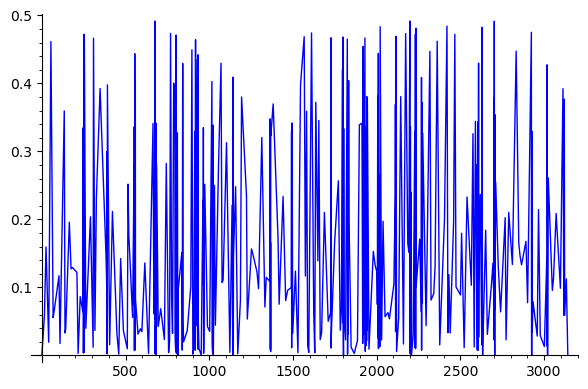

In [114]:
PL01

In [115]:
PL01.get_minmax_data()

{'xmin': 0.0,
 'xmax': 3141.592653589793,
 'ymin': 2.7755575615628914e-17,
 'ymax': 0.49192167099819273}

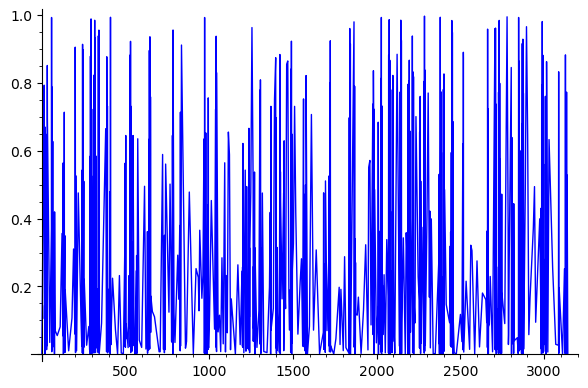

In [116]:
PL02


In [117]:
PL02.get_minmax_data()

{'xmin': 0.0,
 'xmax': 3141.592653589793,
 'ymin': 3.669560133454097e-05,
 'ymax': 0.9973156956755636}

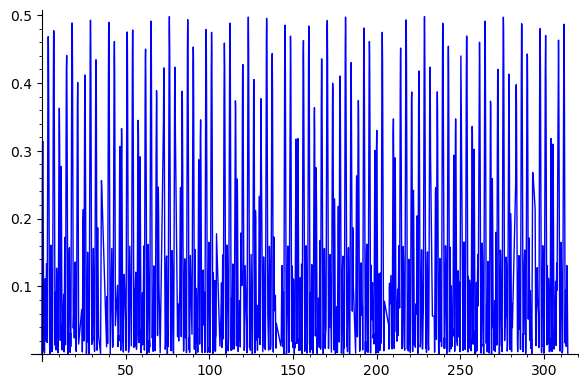

In [118]:
PL03

In [119]:
PL03.get_minmax_data()

{'xmin': 0.0,
 'xmax': 314.1592653589793,
 'ymin': 2.7755575615628914e-17,
 'ymax': 0.4979313261036251}

In [120]:
################################################################################
# Function: sxyu                                                               #
#                                                                              #
# Purpose: calculate sigma_x^u or sigma_y^u                                    #
#                                                                              #
# Arguments:                                                                   #
#   u        integer     index for Pauli matrix                                # 
#   n        integer     total number of matrices                              # 
#   s        character   x or y to choose Pauli matrix                         # 
#                                                                              #
# Returns: matrix sigma_s^u                                                    #
#                                                                              #
################################################################################

def sxyu(u,n,s):
    # Sanity check
    if u > n-1:
        print("Invalid input: u > n-1")
        return
    # Pauli matrices
    SX = matrix([[0,1],[1,0]])
    SY = matrix([[0,-I],[I,0]])
    # Identity
    I2 = matrix([[1,0],[0,1]])
    # Choose which Pauli matrix to use
    S = SX if s == 'x' else SY
    # Compute tensor products
    j = 1
    if u == 0:
        M = S
        while j < n:
            M = M.tensor_product(I2)
            j += 1
    else:
        M = I2
        j = j + 1
        while j <= u:
            M = M.tensor_product(I2)
            j += 1
        M = M.tensor_product(S)
        while j < n:
            M = M.tensor_product(I2)
            j += j
    return M

In [121]:
K3 = np.matrix([[0, -1j, 1j],[1j, 0, -1j],[-1j, 1j, 0]])
K3=matrix(K3)

C4 = np.matrix([[0, -1j, 0, 1j],[1j, 0, -1j, 0],[0, 1j, 0, -1j],[-1j, 0, 1j, 0]])
C4 = matrix(C4) 

C4
W = K3.tensor_product(identity_matrix(4))+identity_matrix(3).tensor_product(C4)
W.round(3)

J4 = np. matrix([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
J4 = matrix(J4)
S = np.matrix([[0,-1j],[1j,0]])
S = matrix(S)
Y = identity_matrix(2).tensor_product(C4)+S.tensor_product(J4)
Y

[   0.0 -1.0*I    0.0  1.0*I -1.0*I -1.0*I -1.0*I -1.0*I]
[ 1.0*I    0.0 -1.0*I    0.0 -1.0*I -1.0*I -1.0*I -1.0*I]
[   0.0  1.0*I    0.0 -1.0*I -1.0*I -1.0*I -1.0*I -1.0*I]
[-1.0*I    0.0  1.0*I    0.0 -1.0*I -1.0*I -1.0*I -1.0*I]
[ 1.0*I  1.0*I  1.0*I  1.0*I    0.0 -1.0*I    0.0  1.0*I]
[ 1.0*I  1.0*I  1.0*I  1.0*I  1.0*I    0.0 -1.0*I    0.0]
[ 1.0*I  1.0*I  1.0*I  1.0*I    0.0  1.0*I    0.0 -1.0*I]
[ 1.0*I  1.0*I  1.0*I  1.0*I -1.0*I    0.0  1.0*I    0.0]

In [122]:
PK01=plot(transfer_at_time_a(Y,x,0,1),0,100*np.pi)
PK02=plot(transfer_at_time_a(Y,x,0,2),0,100*np.pi)
PK03=plot(transfer_at_time_a(Y,x,0,3),0,100*np.pi)
PK05=plot(transfer_at_time_a(Y,x,0,5),0,100*np.pi)
PK06=plot(transfer_at_time_a(Y,x,0,6),0,100*np.pi)


In [123]:
K3

[   0.0 -1.0*I  1.0*I]
[ 1.0*I    0.0 -1.0*I]
[-1.0*I  1.0*I    0.0]

In [124]:
f = Y.charpoly()
f
##x^8 - 24.0*x^6 + 144.0*x^4 - 256.0*x^2
##0 of order 2, pm 2 of order 2, pm 4 of order 1

x^8 - 24.0*x^6 + 144.0*x^4 - 256.0*x^2

In [125]:
PK05.get_minmax_data()

{'xmin': 0.0,
 'xmax': 314.1592653589793,
 'ymin': 0.0,
 'ymax': 0.24999992177277452}

In [126]:
PK06.get_minmax_data()

{'xmin': 0.0,
 'xmax': 314.1592653589793,
 'ymin': 0.0,
 'ymax': 0.24999976121011577}

In [127]:
linalg.eigh(K3)

(array([-1.73205081e+00, -3.57353036e-16,  1.73205081e+00]),
 array([[-0.57735027+0.00000000e+00j, -0.57735027+0.00000000e+00j,
          0.57735027+0.00000000e+00j],
        [ 0.28867513+5.00000000e-01j, -0.57735027-5.55111512e-17j,
         -0.28867513+5.00000000e-01j],
        [ 0.28867513-5.00000000e-01j, -0.57735027-3.70074342e-17j,
         -0.28867513-5.00000000e-01j]]))

In [128]:
################################################################################
# Function: H_theta                                                            #
#                                                                              #
# Purpose: Parametrize a Hamiltonian with theta                                #
#                                                                              #
# Arguments:                                                                   #
#   theta    float     angle to use in parametrization                         #
#                                                                              #
# Returns: Hamiltonian H = [[0,1,1],[1,0,e^{-i\theta}],[1,e^{i\theta},0]]      #
#                                                                              #
################################################################################

def H_theta(theta):
    return np.matrix([[0,1j,-1j],[-1j,0,exp(-1j*theta)],[1j,exp(1j*theta),0]])

In [129]:
# Creates adjacency matrix for corona product on K3 with n vertices
def coronak3(n):
    H = K3
    empty = matrix(n,n,0)
    corpartial = block_matrix([[H,0,0,0],[0,empty,0,0],[0,0,empty,0],[0,0,0,empty]])
    for i in range(n):
        corpartial=corpartial + \
                   matrix(3+3*n,3+3*n,{(3+i,0):1j, (0,3+i):-1j,(3+n+i,1):1j,(1,3+n+i):-1j,(3+2*n+i,2):1j,(2,3+2*n+i):-1j})
    return corpartial

In [193]:
V=coronak3(2) 


[  0.000000000000000    1.00000000000000   0.000000000000000 -1.00000000000000*I -1.00000000000000*I   0.000000000000000   0.000000000000000   0.000000000000000   0.000000000000000]
[   1.00000000000000   0.000000000000000    1.00000000000000   0.000000000000000   0.000000000000000 -1.00000000000000*I -1.00000000000000*I   0.000000000000000   0.000000000000000]
[  0.000000000000000    1.00000000000000   0.000000000000000   0.000000000000000   0.000000000000000   0.000000000000000   0.000000000000000 -1.00000000000000*I -1.00000000000000*I]
[ 1.00000000000000*I   0.000000000000000   0.000000000000000   0.000000000000000   0.000000000000000   0.000000000000000   0.000000000000000   0.000000000000000   0.000000000000000]
[ 1.00000000000000*I   0.000000000000000   0.000000000000000   0.000000000000000   0.000000000000000   0.000000000000000   0.000000000000000   0.000000000000000   0.000000000000000]
[  0.000000000000000  1.00000000000000*I   0.000000000000000   0.000000000000000   0.00000

In [131]:
X,Y = linalg.eigh(V); X

array([-2.52433780e+00, -1.41421356e+00, -7.92286991e-01, -2.43105197e-18,
       -5.51442286e-19,  2.40365056e-17,  7.92286991e-01,  1.41421356e+00,
        2.52433780e+00])

In [132]:
PQ01=plot(transfer_at_time_a(V,x,0,1),0,100*np.pi)



In [133]:
PQ02=plot(transfer_at_time_a(V,x,0,2),0,100*np.pi)

In [134]:
PQ01.get_minmax_data()

{'xmin': 0.0,
 'xmax': 314.1592653589793,
 'ymin': 0.0,
 'ymax': 0.9925868022577051}

In [135]:
PQ02.get_minmax_data()

{'xmin': 0.0,
 'xmax': 314.1592653589793,
 'ymin': 0.0,
 'ymax': 0.9931151256767432}

In [136]:

def corquot(n):
    return np.matrix([[0,1,1,np.sqrt(n),0,0],[1,0,1j,0,np.sqrt(n),0],[1,-1j,0,0,0,np.sqrt(n)],[np.sqrt(n),0,0,0,0,0],[0,np.sqrt(n),0,0,0,0],[0,0,np.sqrt(n),0,0,0]])

In [137]:
K = matrix([[0,1,1],[1,0,1j],[1,-1j,0]]) ; K

[  0.000000000000000    1.00000000000000    1.00000000000000]
[   1.00000000000000   0.000000000000000  1.00000000000000*I]
[   1.00000000000000 -1.00000000000000*I   0.000000000000000]

In [138]:
W,V = linalg.eigh(K)
V=matrix(V) ; V.round(3)

[       -0.577        -0.577         0.577]
[0.5 - 0.289*I       0.577*I 0.5 + 0.289*I]
[0.5 + 0.289*I      -0.577*I 0.5 - 0.289*I]

In [139]:
W,V = linalg.eigh(corquot(5)) 
V=matrix(V)
V.round(3)

[          -0.476           -0.408            0.326            0.326           -0.408           -0.476]
[ 0.412 - 0.238*I          0.408*I  0.283 + 0.163*I -0.283 + 0.163*I          0.408*I -0.412 - 0.238*I]
[ 0.412 + 0.238*I         -0.408*I  0.283 - 0.163*I -0.283 - 0.163*I         -0.408*I -0.412 + 0.238*I]
[           0.326            0.408           -0.476            0.476           -0.408           -0.326]
[-0.283 + 0.163*I         -0.408*I -0.412 - 0.238*I -0.412 + 0.238*I          0.408*I -0.283 - 0.163*I]
[-0.283 - 0.163*I          0.408*I -0.412 + 0.238*I -0.412 - 0.238*I         -0.408*I -0.283 + 0.163*I]

In [140]:
W,V = idempotents(corquot(5)); W

[
[           0.227 -0.196 - 0.113*I -0.196 + 0.113*I           -0.155  0.135 + 0.078*I  0.135 - 0.078*I]
[-0.196 + 0.113*I            0.227  0.113 - 0.196*I  0.135 - 0.078*I           -0.155 -0.078 + 0.135*I]
[-0.196 - 0.113*I  0.113 + 0.196*I            0.227  0.135 + 0.078*I -0.078 - 0.135*I           -0.155]
[          -0.155  0.135 + 0.078*I  0.135 - 0.078*I            0.106 -0.092 - 0.053*I -0.092 + 0.053*I]
[ 0.135 - 0.078*I           -0.155 -0.078 + 0.135*I -0.092 + 0.053*I            0.106  0.053 - 0.092*I]
[ 0.135 + 0.078*I -0.078 - 0.135*I           -0.155 -0.092 - 0.053*I  0.053 + 0.092*I            0.106],

[   0.167  0.167*I -0.167*I   -0.167 -0.167*I  0.167*I]  [           0.106  0.092 - 0.053*I  0.092 + 0.053*I           -0.155 -0.135 + 0.078*I -0.135 - 0.078*I]  [           0.106 -0.092 - 0.053*I -0.092 + 0.053*I            0.155 -0.135 - 0.078*I -0.135 + 0.078*I]
[-0.167*I    0.167   -0.167  0.167*I   -0.167    0.167]  [ 0.092 + 0.053*I            0.106  0.053 + 0.092

In [141]:
-W[0]+W[1]-W[2]+W[3]-W[4]+W[5]

[                         2.7755575615628914e-17  0.20800000000000002 + 1.3877787807814457e-17*I  0.20800000000000002 - 1.3877787807814457e-17*I                                           0.286                                        -0.646*I                                         0.646*I]
[ 0.20800000000000002 - 1.3877787807814457e-17*I                          2.7755575615628914e-17 -1.3877787807814457e-17 + 0.20800000000000002*I                                         0.646*I                                           0.286                                           0.646]
[ 0.20800000000000002 + 1.3877787807814457e-17*I -1.3877787807814457e-17 - 0.20800000000000002*I                          2.7755575615628914e-17                                        -0.646*I                                           0.646                                           0.286]
[                                          0.286                                        -0.646*I                                  

In [189]:
G = graphs.PathGraph(3)
P3=G.adjacency_matrix()
P3 = np.matrix(P3)
P3 = matrix(P3)


In [209]:

def coronaP3(n):
    H = P3
    empty = matrix(n,n,0)
    corpartial = block_matrix([[H,0,0],[0,empty,0],[0,0,empty]])
    for i in range(n):
        corpartial=corpartial + \
                   matrix(3+2*n,3+2*n,{(3+i,0):1, (0,3+i):1,(3+n+i,2):1,(2,3+n+i):1})
    return corpartial

In [239]:
CP3 = coronaP3(4) ; CP3

[0 1 0 1 1 1 1 0 0 0 0]
[1 0 1 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 1 1 1 1]
[1 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0]

In [226]:
W,V = linalg.eigh(CP3) ; W

array([-2.        , -1.41421356,  0.        ,  0.        ,  0.        ,
        1.41421356,  2.        ])

In [241]:
PP01=plot(transfer_at_time_a(CP3,x,0,2),0,100*np.pi)

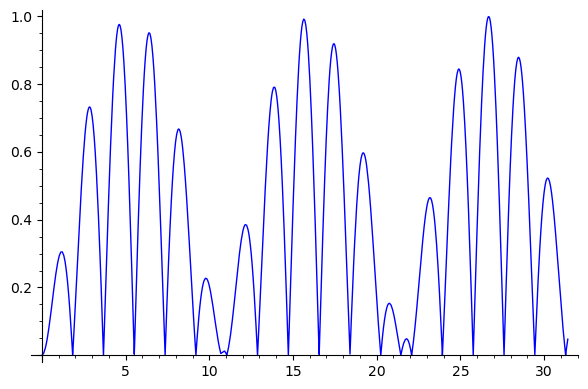

In [232]:
PP01


In [242]:
PP01.get_minmax_data()

{'xmin': 0.0,
 'xmax': 314.1592653589793,
 'ymin': 0.0,
 'ymax': 0.9999090515944313}